<h2 style='color:blue'>Import Libraries</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [2]:
df=pd.read_csv("bengaluru_house_prices.csv")
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [3]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df1=df.drop(["area_type","availability","society","balcony"],axis=1)

In [5]:
df1.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [6]:
df1.shape

(13320, 5)

<h2 style='color:blue'>Data Cleaning</h2>

In [7]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df2=df1.dropna()

In [9]:
df2.shape

(13246, 5)

In [10]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

<h2 style='color:blue'>Feature Engineering</h2>

In [11]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3=df2.copy()

In [13]:
df3["bhk"]=df3["size"].apply(lambda x: int(x.split(" ")[0]) )

In [14]:
df3.head()

location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [15]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
df3.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
bhk                     4
Name: 30, dtype: object

In [17]:
def sqft(x):
    if ("-" in x):
        ans=(float(x.split("-")[0])+float( x.split("-")[1]))/2
        return float(ans)
    try:
        return float(x)
    except:
        return None

In [18]:
df4=df3.copy()

In [19]:
df4["total_sqft"]=df4["total_sqft"].apply(sqft)

In [20]:
df4.head()

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

In [21]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [22]:
df5=df4.copy()

In [23]:
df5.location=df5.location.apply(lambda x: x.strip())

<h2 style="color:blue">Dimensionality Reduction</h2>

In [24]:
len(df5["location"].unique())

1293

In [25]:
location=df5.groupby("location")["location"].agg("count").sort_values(ascending=False)

In [26]:
location

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [27]:
len(location[location<=10])

1052

In [28]:
location_less_than_10=location[location<=10]

In [29]:
location_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [30]:
df5["location"]=df5["location"].apply(lambda x:"other" if x in location_less_than_10 else x)

In [31]:
df5[df5["location"]=="other"]["price"]

9        370.00
18       290.00
19        48.00
25        56.00
42        38.00
          ...  
13291     26.00
13292     63.93
13302     48.00
13306    325.00
13316    400.00
Name: price, Length: 2881, dtype: float64

In [32]:
len(df5["location"].unique())

242

In [33]:
df6=df5.drop("size",axis=1)

In [34]:
df6.head()

location  total_sqft  bath   price  bhk
0  Electronic City Phase II      1056.0   2.0   39.07    2
1          Chikka Tirupathi      2600.0   5.0  120.00    4
2               Uttarahalli      1440.0   2.0   62.00    3
3        Lingadheeranahalli      1521.0   3.0   95.00    3
4                  Kothanur      1200.0   2.0   51.00    2

In [35]:
df6["price_sqft"]=(df6["price"]*100000)/df6["total_sqft"]

In [36]:
df6.head()

location  total_sqft  bath   price  bhk   price_sqft
0  Electronic City Phase II      1056.0   2.0   39.07    2  3699.810606
1          Chikka Tirupathi      2600.0   5.0  120.00    4  4615.384615
2               Uttarahalli      1440.0   2.0   62.00    3  4305.555556
3        Lingadheeranahalli      1521.0   3.0   95.00    3  6245.890861
4                  Kothanur      1200.0   2.0   51.00    2  4250.000000

In [37]:
df6.rename(columns={"price":"price(Lakh)"},inplace=True)

In [38]:
df6.head()

location  total_sqft  bath  price(Lakh)  bhk   price_sqft
0  Electronic City Phase II      1056.0   2.0        39.07    2  3699.810606
1          Chikka Tirupathi      2600.0   5.0       120.00    4  4615.384615
2               Uttarahalli      1440.0   2.0        62.00    3  4305.555556
3        Lingadheeranahalli      1521.0   3.0        95.00    3  6245.890861
4                  Kothanur      1200.0   2.0        51.00    2  4250.000000

<h2 style="color:blue">Outlier Removal Using Business Logic</h2>

In [39]:
df7=df6[~(df6["total_sqft"]/df6["bhk"]<300)]

In [40]:
df7.shape

(12502, 6)

<h2 style='color:blue'>Outlier Removal Using Standard Deviation and Mean</h2>

In [41]:
import numpy as np
def outlier_remove_price_sqft(df):
    res=pd.DataFrame()
    for k,subDataframe in df.groupby("location"):
        mean=np.mean(subDataframe["price_sqft"])
        std=np.std(subDataframe["price_sqft"])
        out=subDataframe[(subDataframe["price_sqft"]>(mean-std)) & (subDataframe["price_sqft"]<(mean+std))]
        res=pd.concat([res,out],ignore_index=True)
    return res    

In [42]:
df7=outlier_remove_price_sqft(df7)

In [43]:
df7[(df7["location"]=="1st Block Jayanagar") & (df7["bhk"]==2)]

location  total_sqft  bath  price(Lakh)  bhk    price_sqft
4  1st Block Jayanagar      1235.0   2.0        148.0    2  11983.805668

In [44]:
df7.groupby("location")["location"].agg("count").loc["1st Block Jayanagar"]

7

In [45]:
df7.head()

location  total_sqft  bath  price(Lakh)  bhk    price_sqft
0  1st Block Jayanagar      2850.0   4.0        428.0    4  15017.543860
1  1st Block Jayanagar      1630.0   3.0        194.0    3  11901.840491
2  1st Block Jayanagar      1875.0   2.0        235.0    3  12533.333333
3  1st Block Jayanagar      1200.0   2.0        130.0    3  10833.333333
4  1st Block Jayanagar      1235.0   2.0        148.0    2  11983.805668

In [46]:
df7["location"].unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [47]:
def plot_scatter_plot(df,location):
    bhk2=df[(df["location"]==location) & (df["bhk"]==2)]
    bhk3=df[(df["location"]==location) & (df["bhk"]==3)]
    plt.scatter(bhk2.total_sqft,bhk2["price(Lakh)"],color="blue",label="2 BHK",s=50 )
    plt.scatter(bhk3.total_sqft,bhk3["price(Lakh)"],marker="+",color="red",label="3 BHK",s=50 )
    plt.xlabel("total_sqft")
    plt.ylabel("price(Lakh)")
    plt.title(location)
    plt.legend()

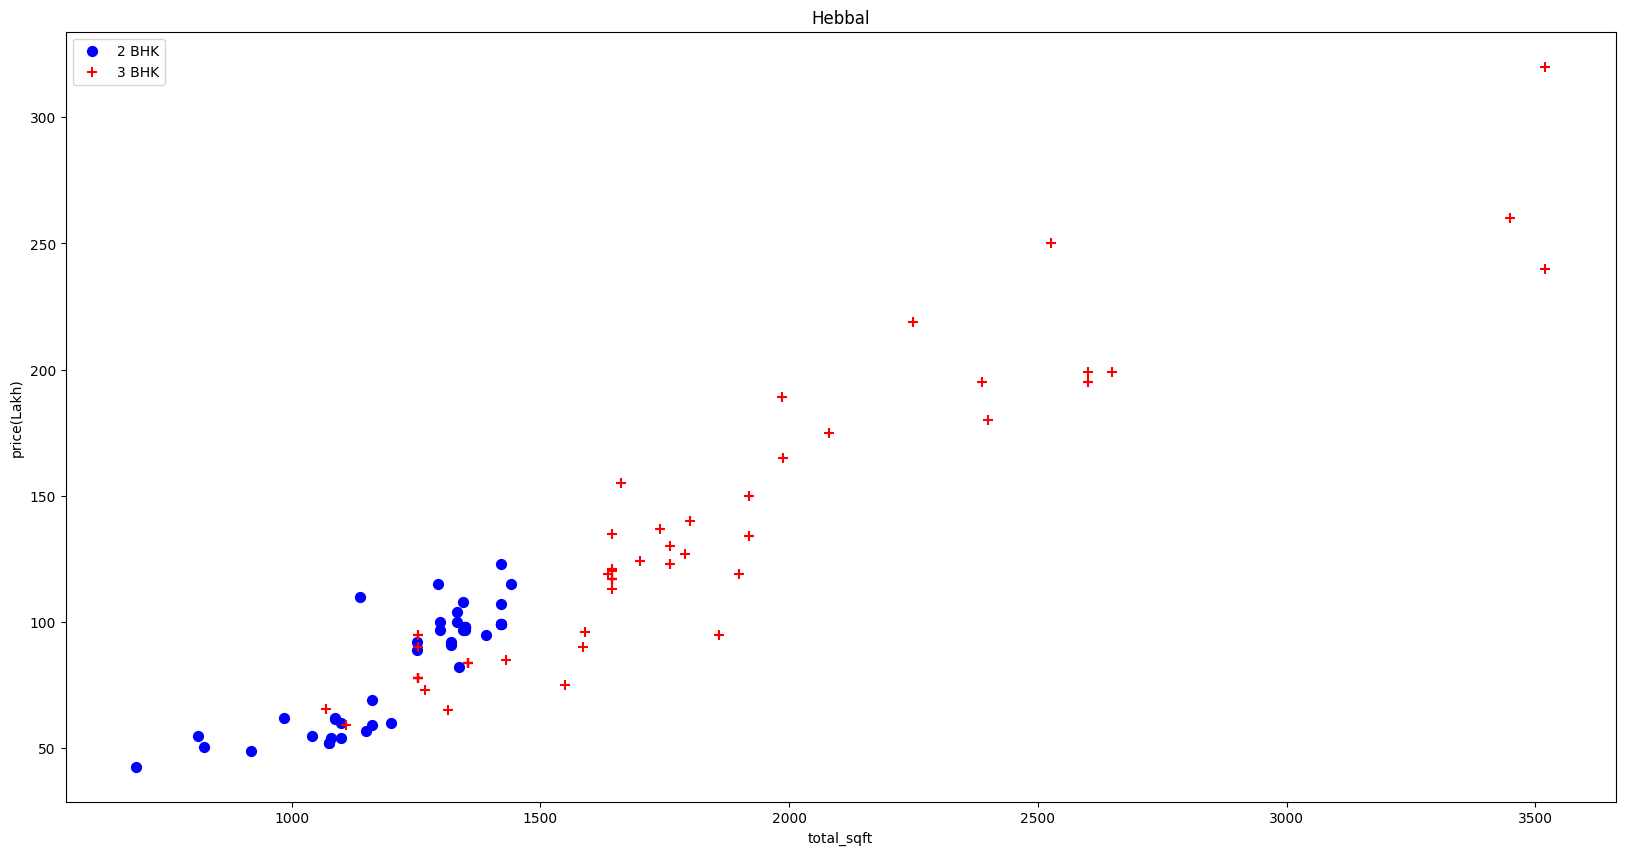

In [48]:
plot_scatter_plot(df7,"Hebbal")

In [49]:
df7.shape

(10241, 6)

In [50]:
df7.head()

location  total_sqft  bath  price(Lakh)  bhk    price_sqft
0  1st Block Jayanagar      2850.0   4.0        428.0    4  15017.543860
1  1st Block Jayanagar      1630.0   3.0        194.0    3  11901.840491
2  1st Block Jayanagar      1875.0   2.0        235.0    3  12533.333333
3  1st Block Jayanagar      1200.0   2.0        130.0    3  10833.333333
4  1st Block Jayanagar      1235.0   2.0        148.0    2  11983.805668

In [51]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_sqft),
                'std': np.std(bhk_df.price_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 6)

In [52]:
df8.isnull().sum()

location       0
total_sqft     0
bath           0
price(Lakh)    0
bhk            0
price_sqft     0
dtype: int64

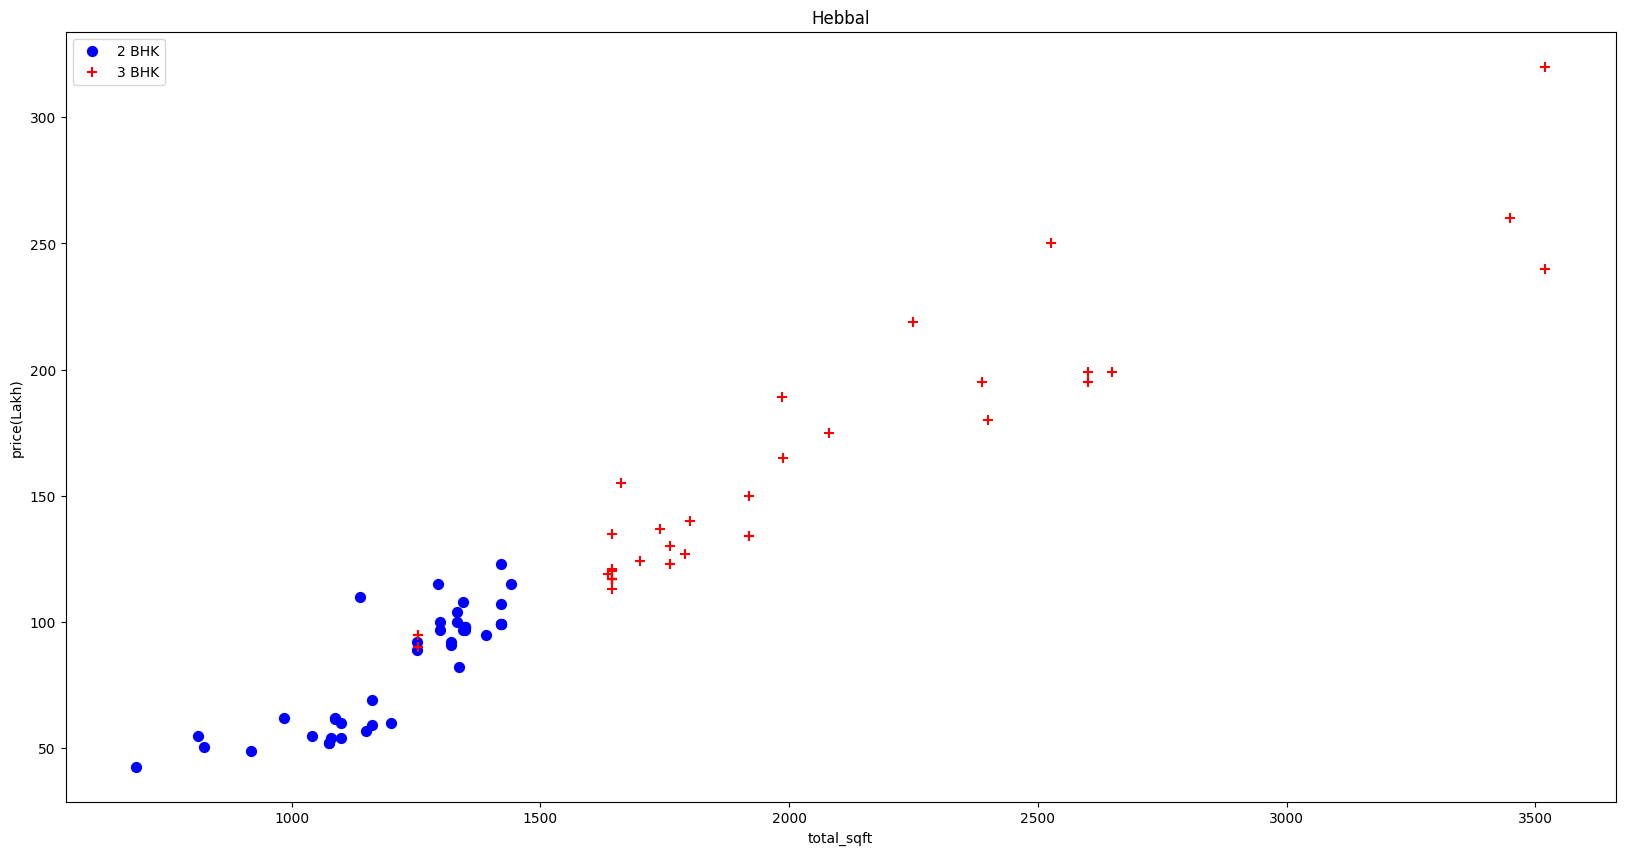

In [53]:
plot_scatter_plot(df8,"Hebbal")

In [54]:
df8.head()

location  total_sqft  bath  price(Lakh)  bhk    price_sqft
0  1st Block Jayanagar      2850.0   4.0        428.0    4  15017.543860
1  1st Block Jayanagar      1630.0   3.0        194.0    3  11901.840491
2  1st Block Jayanagar      1875.0   2.0        235.0    3  12533.333333
3  1st Block Jayanagar      1200.0   2.0        130.0    3  10833.333333
4  1st Block Jayanagar      1235.0   2.0        148.0    2  11983.805668

In [55]:
# df8["bath"]=df8["bath"].apply(lambda x: int(x))

Text(0, 0.5, 'count')

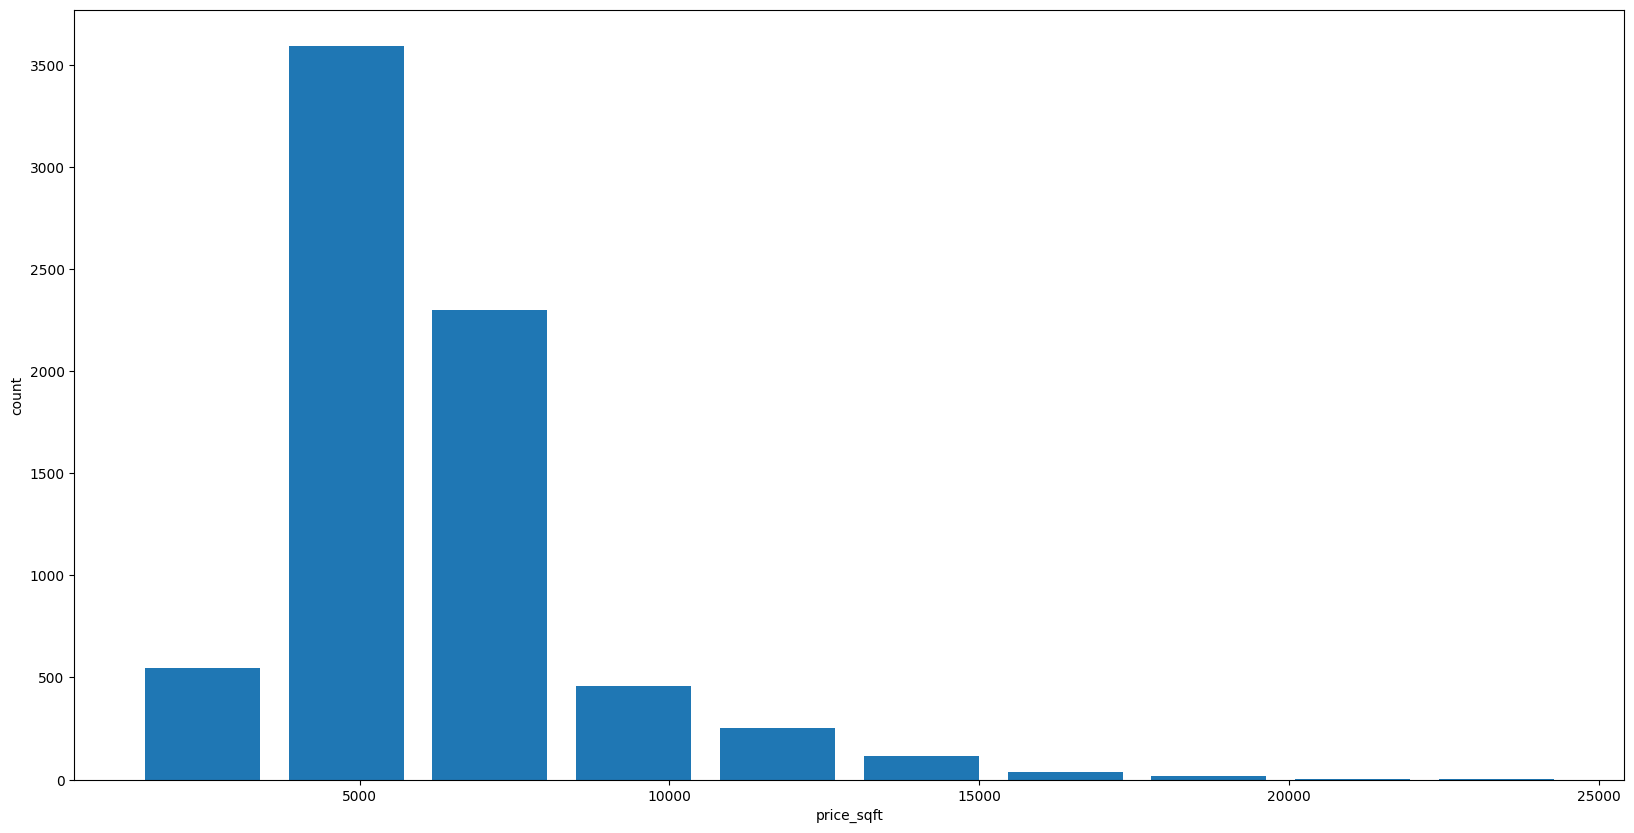

In [56]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8["price_sqft"],rwidth=0.8)
plt.xlabel("price_sqft")
plt.ylabel("count")

Text(0, 0.5, 'Count')

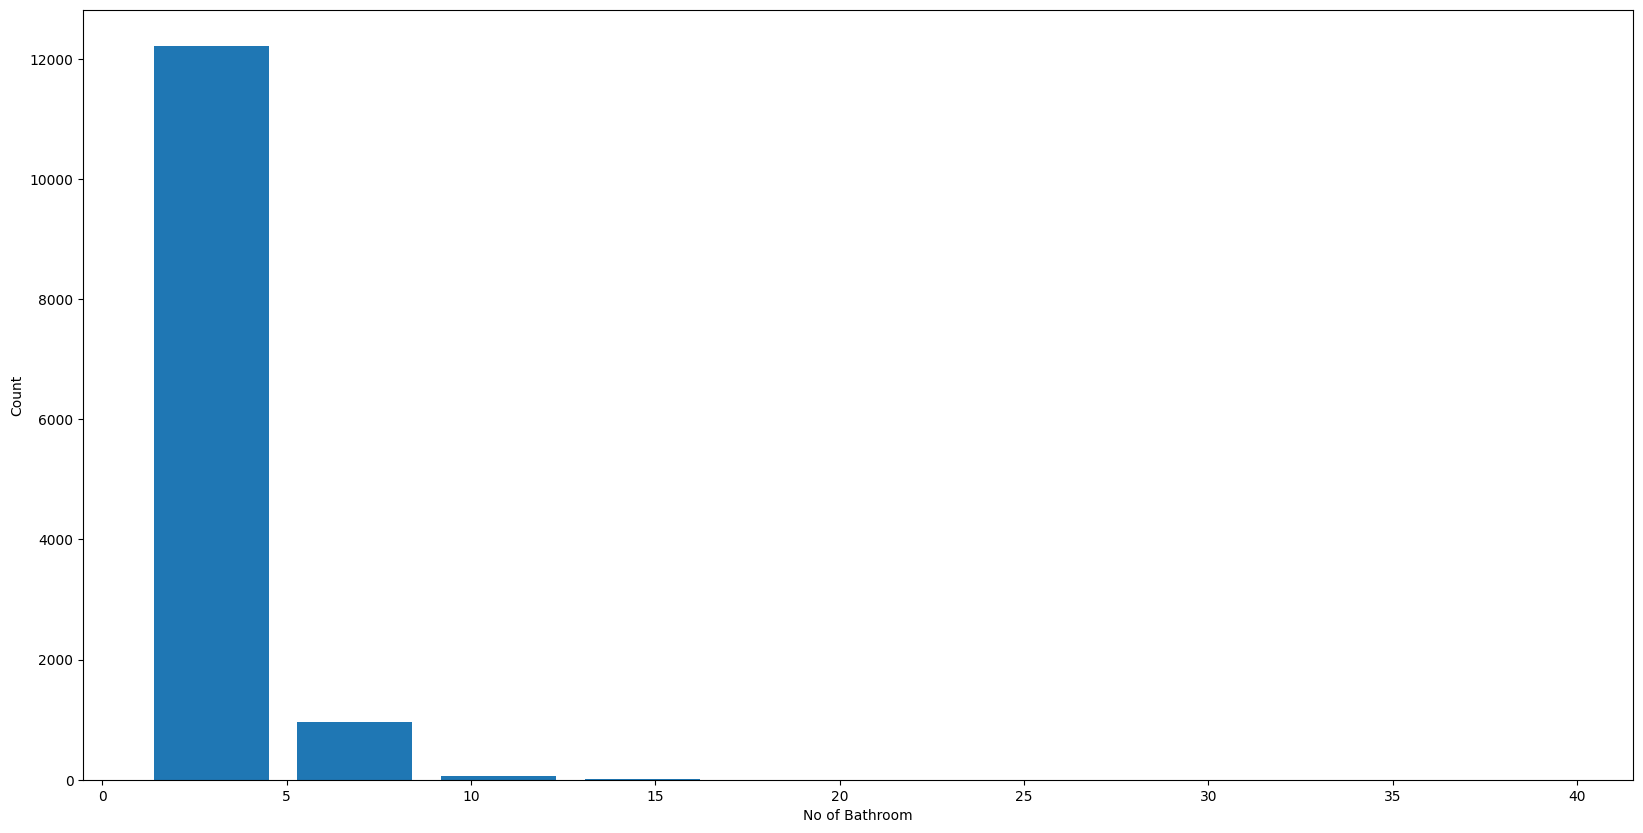

In [57]:
plt.hist(df["bath"],rwidth=0.8)
plt.xlabel("No of Bathroom")
plt.ylabel("Count")

<h2 style='color:blue'>Outlier Removal Using Bathrooms Feature</h2>

In [58]:
df8[df8["bath"]>df8["bhk"]+2]

location  total_sqft  bath  price(Lakh)  bhk   price_sqft
1626  Chikkabanavar      2460.0   7.0         80.0    4  3252.032520
5238     Nagasandra      7000.0   8.0        450.0    4  6428.571429
6711    Thanisandra      1806.0   6.0        116.0    3  6423.034330
8411          other     11338.0   9.0       1000.0    6  8819.897689

In [59]:
# df8[df8.bath>df8.bhk+2]

In [60]:
df9=df8[(df8["bath"]<df8["bhk"]+2)]

In [61]:
df9.shape

(7251, 6)

In [62]:
df10=df9.drop("price_sqft",axis=1)

<h2 style='color:blue'>Use One Hot Encoding For Location</h2>

In [63]:
dummies=pd.get_dummies(df10["location"])

In [64]:
pd.set_option('future.no_silent_downcasting', True)
replace_dummies = dummies.replace([True, False], [1, 0])

In [65]:
df11=pd.concat([df10,replace_dummies],axis=1)

In [66]:
df11.head()

location  total_sqft  bath  price(Lakh)  bhk  \
0  1st Block Jayanagar      2850.0   4.0        428.0    4   
1  1st Block Jayanagar      1630.0   3.0        194.0    3   
2  1st Block Jayanagar      1875.0   2.0        235.0    3   
3  1st Block Jayanagar      1200.0   2.0        130.0    3   
4  1st Block Jayanagar      1235.0   2.0        148.0    2   

  1st Block Jayanagar 1st Phase JP Nagar 2nd Phase Judicial Layout  \
0                   1                  0                         0   
1                   1                  0                         0   
2                   1                  0                         0   
3                   1                  0                         0   
4                   1                  0                         0   

  2nd Stage Nagarbhavi 5th Block Hbr Layout  ... Vishveshwarya Layout  \
0                    0                    0  ...                    0   
1                    0                    0  ...                    0   
2                    0                    0  ...                    0   
3                    0                    0  ...                    0   
4                    0                    0  ...                    0   

  Vishwapriya Layout Vittasandra Whitefield Yelachenahalli Yelahanka  \
0                  0           0          0              0         0   
1                  0           0          0              0         0   
2                  0           0          0              0         0   
3                  0           0          0              0         0   
4                  0           0          0              0         0   

  Yelahanka New Town Yelenahalli Yeshwanthpur other  
0                  0           0            0     0  
1                  0           0            0     0  
2                  0           0            0     0  
3                  0           0            0     0  
4                  0           0            0     0  

[5 rows x 247 columns]

In [67]:
df12=df11.drop("location",axis=1)

In [68]:
df12.head()

total_sqft  bath  price(Lakh)  bhk 1st Block Jayanagar 1st Phase JP Nagar  \
0      2850.0   4.0        428.0    4                   1                  0   
1      1630.0   3.0        194.0    3                   1                  0   
2      1875.0   2.0        235.0    3                   1                  0   
3      1200.0   2.0        130.0    3                   1                  0   
4      1235.0   2.0        148.0    2                   1                  0   

  2nd Phase Judicial Layout 2nd Stage Nagarbhavi 5th Block Hbr Layout  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   

  5th Phase JP Nagar  ... Vishveshwarya Layout Vishwapriya Layout Vittasandra  \
0                  0  ...                    0                  0           0   
1                  0  ...                    0                  0           0   
2                  0  ...                    0                  0           0   
3                  0  ...                    0                  0           0   
4                  0  ...                    0                  0           0   

  Whitefield Yelachenahalli Yelahanka Yelahanka New Town Yelenahalli  \
0          0              0         0                  0           0   
1          0              0         0                  0           0   
2          0              0         0                  0           0   
3          0              0         0                  0           0   
4          0              0         0                  0           0   

  Yeshwanthpur other  
0            0     0  
1            0     0  
2            0     0  
3            0     0  
4            0     0  

[5 rows x 246 columns]

In [69]:
df12.shape

(7251, 246)

<h2 style='color:blue'>Build a Model</h2>

In [70]:
x=df12.drop("price(Lakh)",axis=1)
y=df12["price(Lakh)"]

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [72]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [73]:
reg.score(x_test,y_test)

0.845227769787359

<h2 style='color:blue'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h2>

In [74]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [75]:
cv=ShuffleSplit(n_splits=5,random_state=0,test_size=0.2)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82418424, 0.77166234, 0.85089567, 0.80869901, 0.83653286])

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [77]:
model_params={
    'LinearRegression':{
        'model': LinearRegression(),
        'params':{"fit_intercept":[True,False]}
    },
    'Lasso':{
        'model': Lasso(),
        'params':{"alpha":[1,2],
                 "selection":["random", "cyclic"]}
    },
    'DecisionTreeRegressor':{'model':DecisionTreeRegressor(),
                   'params':{'criterion':["squared_error","absolute_error"],
                            'splitter':["best","random"]}}
   
    }

In [78]:
# res=[]
# for name,param in model_params.items():
#     ce=GridSearchCV(param['model'],param['params'],cv=cv,return_train_score=False)
#     ce.fit(x,y)
#     res.append(
#         {
#             'model':name,
#             'best_score':ce.best_score_,
#             'best_param':ce.best_params_
#         }
#     )

In [79]:
# best_params

In [80]:
x.head()

total_sqft  bath  bhk 1st Block Jayanagar 1st Phase JP Nagar  \
0      2850.0   4.0    4                   1                  0   
1      1630.0   3.0    3                   1                  0   
2      1875.0   2.0    3                   1                  0   
3      1200.0   2.0    3                   1                  0   
4      1235.0   2.0    2                   1                  0   

  2nd Phase Judicial Layout 2nd Stage Nagarbhavi 5th Block Hbr Layout  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   

  5th Phase JP Nagar 6th Phase JP Nagar  ... Vishveshwarya Layout  \
0                  0                  0  ...                    0   
1                  0                  0  ...                    0   
2                  0                  0  ...                    0   
3                  0                  0  ...                    0   
4                  0                  0  ...                    0   

  Vishwapriya Layout Vittasandra Whitefield Yelachenahalli Yelahanka  \
0                  0           0          0              0         0   
1                  0           0          0              0         0   
2                  0           0          0              0         0   
3                  0           0          0              0         0   
4                  0           0          0              0         0   

  Yelahanka New Town Yelenahalli Yeshwanthpur other  
0                  0           0            0     0  
1                  0           0            0     0  
2                  0           0            0     0  
3                  0           0            0     0  
4                  0           0            0     0  

[5 rows x 245 columns]

In [81]:
np.where(x.columns=="1st Phase JP Nagar")[0][0]

4

In [82]:
np.zeros(len(x.columns))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [83]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index>=0:
        X[loc_index]=1
    return reg.predict([X])[0]    

In [84]:
df12.head()

total_sqft  bath  price(Lakh)  bhk 1st Block Jayanagar 1st Phase JP Nagar  \
0      2850.0   4.0        428.0    4                   1                  0   
1      1630.0   3.0        194.0    3                   1                  0   
2      1875.0   2.0        235.0    3                   1                  0   
3      1200.0   2.0        130.0    3                   1                  0   
4      1235.0   2.0        148.0    2                   1                  0   

  2nd Phase Judicial Layout 2nd Stage Nagarbhavi 5th Block Hbr Layout  \
0                         0                    0                    0   
1                         0                    0                    0   
2                         0                    0                    0   
3                         0                    0                    0   
4                         0                    0                    0   

  5th Phase JP Nagar  ... Vishveshwarya Layout Vishwapriya Layout Vittasandra  \
0                  0  ...                    0                  0           0   
1                  0  ...                    0                  0           0   
2                  0  ...                    0                  0           0   
3                  0  ...                    0                  0           0   
4                  0  ...                    0                  0           0   

  Whitefield Yelachenahalli Yelahanka Yelahanka New Town Yelenahalli  \
0          0              0         0                  0           0   
1          0              0         0                  0           0   
2          0              0         0                  0           0   
3          0              0         0                  0           0   
4          0              0         0                  0           0   

  Yeshwanthpur other  
0            0     0  
1            0     0  
2            0     0  
3            0     0  
4            0     0  

[5 rows x 246 columns]

In [85]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=245)

<h2 style='color:blue'>Test the model for few properties</h2>

In [86]:
predict_price("1st Block Jayanagar",1700,2,3)

255.80986305070388

<h2 style='color:blue'>Export the tested model to a pickle file</h2>

In [87]:
import pickle

In [88]:
with open("home_price_prediction.pickle","wb") as f:
    pickle.dump(reg,f)
    

In [89]:
with open("home_price_prediction.pickle","rb") as f:
    pre=pickle.load(f)

<h2 style='color:blue'>Export location and column information to a file that will be useful later on in our prediction application</h2>

In [90]:
import json

In [91]:
columns={

    'data_columns':[col.lower() for col in x.columns]
}

In [92]:
with open("columns.json","w") as f:
    f.write(json.dumps(columns))